Inicialemnte para que fosse possível a análise e manipulação dos dados presentes no DataSet em questão, foi necessário o uso de uma biblioteca bastante conhecida, a biblioteca PANDAS, que é focada em análise de dados, sendo peça chave para a conclusão do projeto como todo. Além do PANDAS, outra biblioteca utilizada foi a Matplotlib, para tornar a visualização dos resultados mais Objetiva e Agradável.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Com as bibliotecas já importadas, o próximo passo é definir o Data Frame de nosso interesse. (Em casos do arquivo do Data Set não estar na mesma pasta do Sketch, basta utilizar o caminho do diretório onde o arquivo se encontra.)

In [4]:
df_poke_pow_gen = pd.read_csv("pokemon.csv")

A coluna 'percentage_male' que nos mostra a porcentagem de Pokémons machos para cada raça de Pokémon presente no Data Set, será a nossa coluna de referência para esta pesquisa. Contudo, nesta coluna existem linhas com valores nulos que influenciariam diretamente no resultado final, além de estar desorganizado. Portanto, para isso, foi realizada uma filtragem e uma classificação decrescente dos valores dessa coluna.

In [5]:
clasf_gen = df_poke_pow_gen.sort_values('percentage_male', ascending=False, na_position='first').dropna(subset=['percentage_male'], axis='index', ignore_index=True)

Com a coluna disposta da melhor maneira possível, o próximo passo é calcular o de poder de cada Pokémon do Data Set, para por fim comparar e saber onde estão localizados os Pokémons mais fortes.

In [9]:
poder_poke = (((((2 * 100)/5) + 2) * (clasf_gen['attack'] / clasf_gen['defense'])) / 50) + 2

Definimos a variavel genero para facilitar a plotagem

In [10]:
genero = clasf_gen['percentage_male']

Realizamos a comparação do poder de cada Pokémon com média.

In [11]:
media_poder = poder_poke.mean()
poder_acima_media = poder_poke > media_poder
poder_abaixo_media = poder_poke < media_poder

E por fim, plotamos o gráfico.

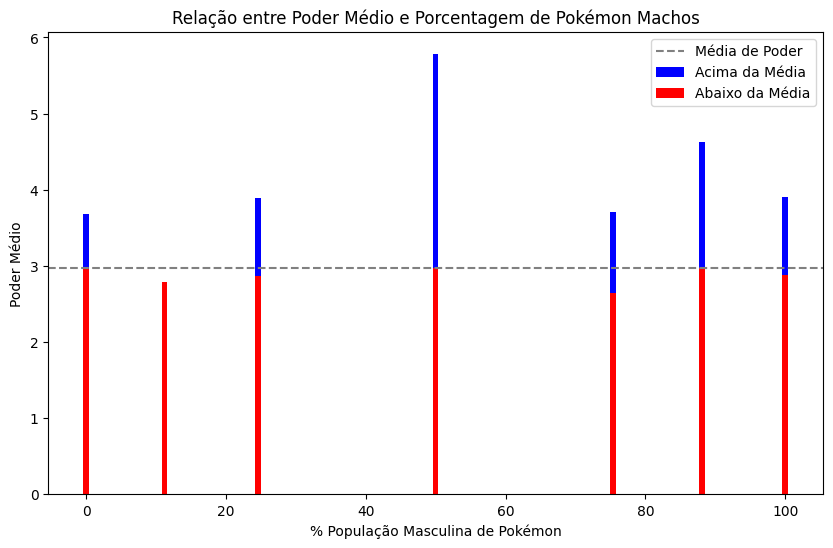

In [12]:
plt.figure(figsize=(10, 6))

plt.bar(genero[poder_acima_media], poder_poke[poder_acima_media], color='blue', label='Acima da Média')
plt.bar(genero[poder_abaixo_media], poder_poke[poder_abaixo_media], color='red', label='Abaixo da Média')

plt.axhline(y=media_poder, color='gray', linestyle='--', label='Média de Poder')

plt.xlabel('% População Masculina de Pokémon')
plt.ylabel('Poder Médio')
plt.title('Relação entre Poder Médio e Porcentagem de Pokémon Machos')
plt.legend()
plt.show()